### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### Data Understanding

In [3]:
train_df = pd.read_csv('UNSW_NB15_training-set.csv')
train_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [4]:
train_df['label'].value_counts()

label
1    119341
0     56000
Name: count, dtype: int64

In [5]:
train_df.shape

(175341, 45)

In [6]:
train_df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [7]:
train_df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [8]:
train_df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,4.953000,6.948010,985.976864,88.216296,4.976254e+03,604.353826,116.257339,9.692504e+08,9.688770e+08,115.013625,0.041396,0.021020,0.020375,136.751769,124.173382,0.105982,2.144292e+03,9.306437,1.304179,6.193936,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,66.005059,52.732999,7242.245841,987.093195,4.496585e+04,4061.043281,127.001024,1.355264e+09,1.354000e+09,126.886530,0.079354,0.043400,0.040506,204.677360,258.317056,0.776911,5.420797e+04,10.704331,0.954406,8.052476,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,0.000000,0.000000,0.279733,0.006000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,55.156896,51.053000,2.513295e+03,114.990625,255.000000,1.916651e+09,1.913675e+09,255.000000,0.065481,0.023268,0.038906,100.000000,89.000000,0.000000,0.000000e+00,12.000000,2.000000,7.000000,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,4803.000000,5484.000000,84371.496000,56716.824000,1.460480e+06,289388.269700,255.000000,4.294959e+09,4.294882e+09,255.000000,2.518893,2.100352,1.520884,1504.000000,1458.000000,172.000000,6.558056e+06,63.000000,6.000000,51.000000,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [10]:
train_df['label'].value_counts(normalize = 'true')

label
1    0.680622
0    0.319378
Name: proportion, dtype: float64

In [11]:
train_df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

### EDA

1. If dttl, dpkts, dload, dinpkt is zero, then 92% of chance that there is an intrusion
2. If dttl is 0 then dload is also zero
3. If either the source or destination packet is lost then there is 82% of attack happened
4. If either the source or destination jitter is 0, then there is 82% of attack happened

#### 1. Duration

In [12]:
train_df['dur'].describe()          #min 0 duration indicates unfinishes transcations

count    175341.000000
mean          1.359389
std           6.480249
min           0.000000
25%           0.000008
50%           0.001582
75%           0.668069
max          59.999989
Name: dur, dtype: float64

<Axes: xlabel='dur', ylabel='Density'>

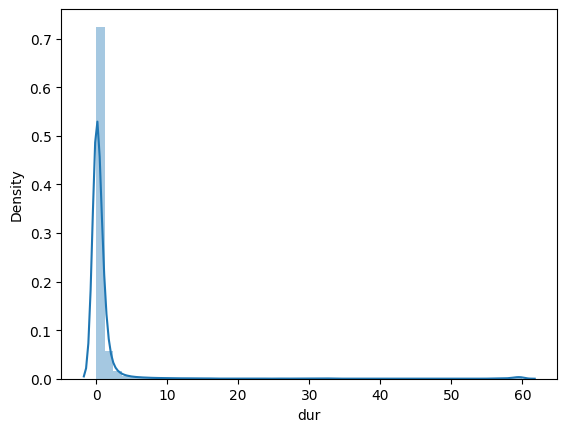

In [13]:
sns.distplot(train_df['dur'])

In [14]:
from scipy.stats import pointbiserialr

In [15]:
pointbiserialr(train_df['dur'], train_df['label'])      #small p-value --> correlation exists

SignificanceResult(statistic=np.float64(0.036174581586845674), pvalue=np.float64(7.29375039851866e-52))

#### 2. Protocol

In [16]:
train_df['proto'].unique()

array(['tcp', 'udp', 'arp', 'ospf', 'icmp', 'igmp', 'rtp', 'ddp',
       'ipv6-frag', 'cftp', 'wsn', 'pvp', 'wb-expak', 'mtp', 'pri-enc',
       'sat-mon', 'cphb', 'sun-nd', 'iso-ip', 'xtp', 'il', 'unas',
       'mfe-nsp', '3pc', 'ipv6-route', 'idrp', 'bna', 'swipe',
       'kryptolan', 'cpnx', 'rsvp', 'wb-mon', 'vmtp', 'ib', 'dgp',
       'eigrp', 'ax.25', 'gmtp', 'pnni', 'sep', 'pgm', 'idpr-cmtp',
       'zero', 'rvd', 'mobile', 'narp', 'fc', 'pipe', 'ipcomp', 'ipv6-no',
       'sat-expak', 'ipv6-opts', 'snp', 'ipcv', 'br-sat-mon', 'ttp',
       'tcf', 'nsfnet-igp', 'sprite-rpc', 'aes-sp3-d', 'sccopmce', 'sctp',
       'qnx', 'scps', 'etherip', 'aris', 'pim', 'compaq-peer', 'vrrp',
       'iatp', 'stp', 'l2tp', 'srp', 'sm', 'isis', 'smp', 'fire', 'ptp',
       'crtp', 'sps', 'merit-inp', 'idpr', 'skip', 'any', 'larp', 'ipip',
       'micp', 'encap', 'ifmp', 'tp++', 'a/n', 'ipv6', 'i-nlsp',
       'ipx-n-ip', 'sdrp', 'tlsp', 'gre', 'mhrp', 'ddx', 'ippc', 'visa',
       'secure-vmtp', 

In [17]:
train_df['proto'].nunique() #hash encoding, target encoding

133

In [18]:
train_df['proto'].value_counts(ascending = True)

proto
rtp            1
icmp          15
igmp          18
bbn-rcc       98
rdp           98
           ...  
ospf        2595
arp         2859
unas       12084
udp        63283
tcp        79946
Name: count, Length: 133, dtype: int64

In [19]:
contingency_table = pd.crosstab(train_df['proto'], train_df['label'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

In [20]:
chi2, p

(np.float64(33195.043556062636), np.float64(0.0))

#### 3. Service

In [21]:
train_df['service'].value_counts()   #'-' indicates Unknown or Unidentified Service or Less Commonly Used Service

service
-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: count, dtype: int64

In [22]:
contingency_table = pd.crosstab(train_df['service'], train_df['label'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

In [23]:
chi2, p

(np.float64(12985.661216498298), np.float64(0.0))

#### 4. State

In [24]:
train_df['state'].unique()

array(['FIN', 'INT', 'CON', 'ECO', 'REQ', 'RST', 'PAR', 'URN', 'no'],
      dtype=object)

In [25]:
train_df['state'].nunique()

9

In [26]:
train_df['state'].value_counts()

state
INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
PAR        1
URN        1
no         1
Name: count, dtype: int64

In [27]:
contingency_table = pd.crosstab(train_df['state'], train_df['label'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2, p

(np.float64(54767.68198808213), np.float64(0.0))

#### 5. SPKTS (Source Packets)

In [28]:
train_df['spkts'].describe()

count    175341.000000
mean         20.298664
std         136.887597
min           1.000000
25%           2.000000
50%           2.000000
75%          12.000000
max        9616.000000
Name: spkts, dtype: float64

<Axes: xlabel='spkts', ylabel='Density'>

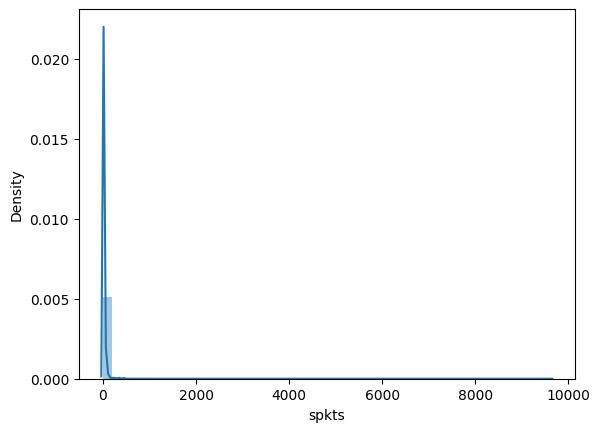

In [29]:
sns.distplot(train_df['spkts'])

In [30]:
pointbiserialr(train_df['spkts'], train_df['label'])

SignificanceResult(statistic=np.float64(-0.05217808377307206), pvalue=np.float64(5.764315593385732e-106))

#### 4. DPKTS (Destination Packets)

In [31]:
train_df['dpkts'].describe()

count    175341.000000
mean         18.969591
std         110.258271
min           0.000000
25%           0.000000
50%           2.000000
75%          10.000000
max       10974.000000
Name: dpkts, dtype: float64

<Axes: xlabel='dpkts', ylabel='Density'>

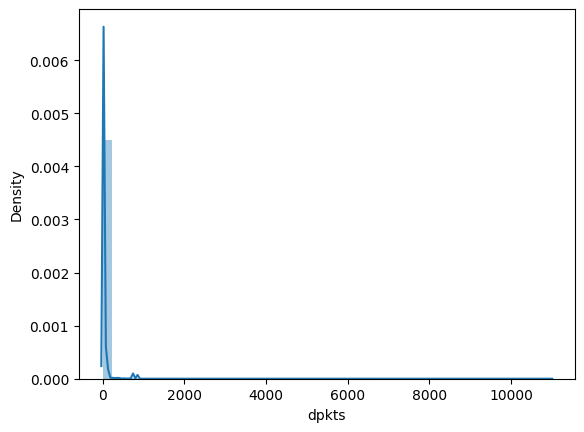

In [32]:
sns.distplot(train_df['dpkts'])

In [33]:
total_dpkts = train_df.loc[train_df['dpkts'] == 0]  #maybe a unidirectional traffic

In [34]:
dpkts_normal = train_df.loc[(train_df['dpkts'] == 0) & (train_df['label'] == 0)] 
dpkts_attack = train_df.loc[(train_df['dpkts'] == 0) & (train_df['label'] == 1)] 

In [35]:
len(dpkts_attack) / len(total_dpkts)

0.9210270283097222

In [36]:
pointbiserialr(train_df['dpkts'], train_df['label'])

SignificanceResult(statistic=np.float64(-0.11859109296891934), pvalue=np.float64(0.0))

#### 7. SBytes (Source Bytes)

In [37]:
train_df['sbytes'].describe()

count    1.753410e+05
mean     8.844844e+03
std      1.747656e+05
min      2.800000e+01
25%      1.140000e+02
50%      4.300000e+02
75%      1.418000e+03
max      1.296523e+07
Name: sbytes, dtype: float64

<Axes: xlabel='sbytes', ylabel='Density'>

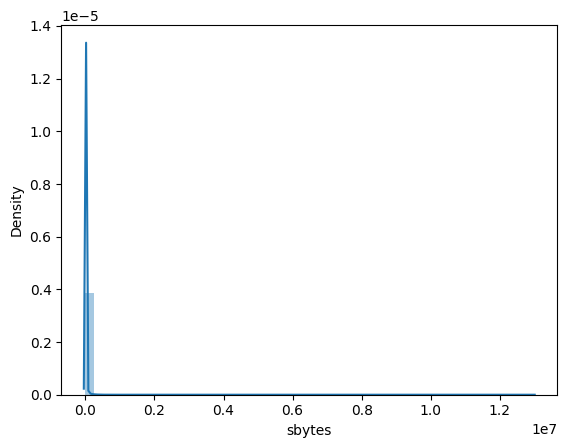

In [38]:
sns.distplot(train_df['sbytes'])

#### 8. DBytes (Destination Bytes)

In [39]:
train_df['dbytes'].describe()

count    1.753410e+05
mean     1.492892e+04
std      1.436542e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.640000e+02
75%      1.102000e+03
max      1.465555e+07
Name: dbytes, dtype: float64

<Axes: xlabel='dbytes', ylabel='Density'>

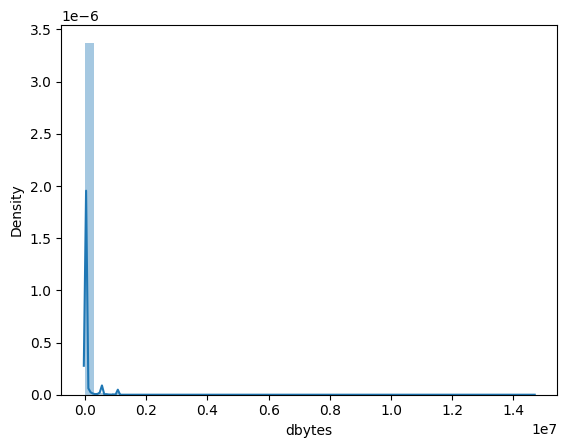

In [40]:
sns.distplot(train_df['dbytes'])

In [41]:
train_df.loc[train_df['dbytes'] == 0]

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.00130,254,0,276000000.0,0.0,0,0,0.002,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,69,0,0,0,1,2,1,1,1,4,0,0,0,2,1,0,Normal,0
29,30,0.000012,udp,-,INT,2,0,1414,0,83333.33039,254,0,471333312.0,0.0,0,0,0.012,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,707,0,0,0,7,2,1,1,1,3,0,0,0,2,3,0,Normal,0
33,34,0.000025,udp,-,INT,2,0,168,0,40000.00101,254,0,26880000.0,0.0,0,0,0.025,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,84,0,0,0,11,2,1,1,1,2,0,0,0,1,5,0,Normal,0
36,37,0.000015,udp,-,INT,2,0,168,0,66666.66835,254,0,44800000.0,0.0,0,0,0.015,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,84,0,0,0,7,2,1,1,1,3,0,0,0,1,3,0,Normal,0
42,43,0.000008,udp,-,INT,2,0,168,0,125000.00030,254,0,84000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,84,0,0,0,7,2,1,1,1,1,0,0,0,1,2,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.66080,254,0,76000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,45,2,33,33,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.10720,254,0,50666664.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.10720,254,0,50666664.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.10720,254,0,50666664.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,Generic,1


#### 8. Rate

In [42]:
train_df['rate'].describe()

count    1.753410e+05
mean     9.540619e+04
std      1.654010e+05
min      0.000000e+00
25%      3.278614e+01
50%      3.225807e+03
75%      1.250000e+05
max      1.000000e+06
Name: rate, dtype: float64

<Axes: xlabel='rate', ylabel='Density'>

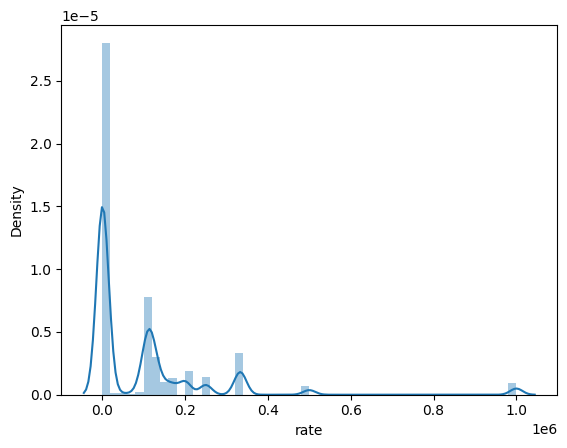

In [43]:
sns.distplot(train_df['rate'])

In [44]:
train_df.loc[train_df['rate'] == 0]   #0, no packet transmission occuring

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
57,58,0.000000,arp,-,INT,1,0,46,0,0.0,0,0,0.0,0.0,0,0,0.000,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,1,2,1,1,1,1,0,0,0,1,2,1,Normal,0
58,59,0.000000,arp,-,INT,1,0,46,0,0.0,0,0,0.0,0.0,0,0,0.000,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
938,939,0.000000,arp,-,INT,1,0,46,0,0.0,0,0,0.0,0.0,0,0,60000.568,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
939,940,0.000000,arp,-,INT,1,0,46,0,0.0,0,0,0.0,0.0,0,0,60000.548,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
3312,3313,0.000000,arp,-,INT,1,0,46,0,0.0,0,0,0.0,0.0,0,0,60000.668,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165947,165948,0.000014,mobile,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.000,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,Exploits,1
165954,165955,0.000009,sun-nd,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.000,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,DoS,1
165961,165962,0.000009,sun-nd,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.000,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,DoS,1
165968,165969,0.000009,sun-nd,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.000,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,Exploits,1


In [45]:
train_df.loc[(train_df['rate'] == 0) & (train_df['label'] == 1)]   

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
49243,49244,0.000000,udp,-,INT,2,0,104,0,0.0,254,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,52,0,0,0,6,2,3,3,1,6,0,0,0,3,6,0,Fuzzers,1
49388,49389,0.000014,mobile,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,3,2,3,3,3,3,0,0,0,3,3,0,Exploits,1
49391,49392,0.000014,mobile,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,3,2,3,3,3,3,0,0,0,3,3,0,Exploits,1
49393,49394,0.000011,sun-nd,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,3,2,3,3,3,3,0,0,0,3,3,0,Exploits,1
49395,49396,0.000011,sun-nd,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,3,2,3,3,3,3,0,0,0,3,3,0,Exploits,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165947,165948,0.000014,mobile,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,Exploits,1
165954,165955,0.000009,sun-nd,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,DoS,1
165961,165962,0.000009,sun-nd,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,DoS,1
165968,165969,0.000009,sun-nd,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,Exploits,1


#### 9. STTL (Source Time - To - Live)

In [46]:
train_df['sttl'].describe()

count    175341.000000
mean        179.546997
std         102.940011
min           0.000000
25%          62.000000
50%         254.000000
75%         254.000000
max         255.000000
Name: sttl, dtype: float64

In [47]:
train_df['sttl'].value_counts()

sttl
254    114743
31      39455
62      17681
0        3162
64        181
1          64
63         32
255        13
60          6
252         2
29          2
Name: count, dtype: int64

<Axes: xlabel='sttl', ylabel='Density'>

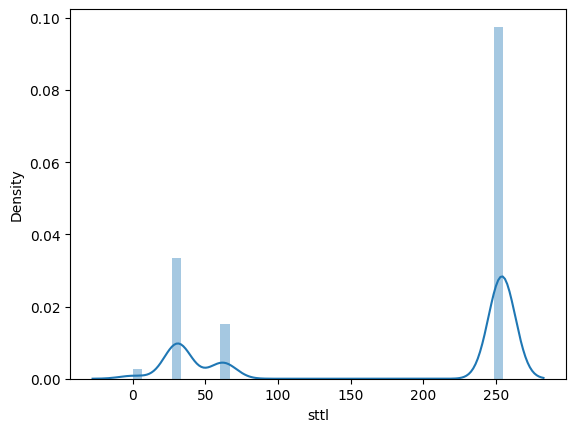

In [48]:
sns.distplot(train_df['sttl'])

In [49]:
train_df.loc[train_df['sttl'] == 0]   

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
53,54,39.666687,arp,-,CON,2,2,56,92,0.075630,0,0,5.647056,9.277307,0,0,39666.520,39666.576,0.000,12.596281,0,0,0,0,0.0,0.0,0.0,28,46,0,0,2,0,1,1,1,1,0,0,0,1,1,0,Normal,0
57,58,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000,0.000000,0,0,0.000,0.000,0.000,0.000000,0,0,0,0,0.0,0.0,0.0,46,0,0,0,1,2,1,1,1,1,0,0,0,1,2,1,Normal,0
58,59,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000,0.000000,0,0,0.000,0.000,0.000,0.000000,0,0,0,0,0.0,0.0,0.0,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
69,70,42.044567,arp,-,CON,2,2,56,92,0.071353,0,0,5.327680,8.752617,0,0,42043.472,42043.552,0.000,0.000000,0,0,0,0,0.0,0.0,0.0,28,46,0,0,2,0,1,1,1,1,0,0,0,1,2,0,Normal,0
75,76,30.984749,arp,-,CON,4,4,184,112,0.225918,0,0,35.630432,21.688089,0,0,10328.249,10328.246,14606.326,14606.334000,0,0,0,0,0.0,0.0,0.0,46,28,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165947,165948,0.000014,mobile,-,INT,1,0,60,0,0.000000,0,0,0.000000,0.000000,0,0,0.000,0.000,0.000,0.000000,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,Exploits,1
165954,165955,0.000009,sun-nd,-,INT,1,0,60,0,0.000000,0,0,0.000000,0.000000,0,0,0.000,0.000,0.000,0.000000,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,DoS,1
165961,165962,0.000009,sun-nd,-,INT,1,0,60,0,0.000000,0,0,0.000000,0.000000,0,0,0.000,0.000,0.000,0.000000,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,DoS,1
165968,165969,0.000009,sun-nd,-,INT,1,0,60,0,0.000000,0,0,0.000000,0.000000,0,0,0.000,0.000,0.000,0.000000,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,Exploits,1


In [50]:
train_df.loc[(train_df['sttl'] == 0) & (train_df['label'] == 1)] 

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
49388,49389,0.000014,mobile,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,3,2,3,3,3,3,0,0,0,3,3,0,Exploits,1
49391,49392,0.000014,mobile,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,3,2,3,3,3,3,0,0,0,3,3,0,Exploits,1
49393,49394,0.000011,sun-nd,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,3,2,3,3,3,3,0,0,0,3,3,0,Exploits,1
49395,49396,0.000011,sun-nd,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,3,2,3,3,3,3,0,0,0,3,3,0,Exploits,1
49397,49398,0.000011,sun-nd,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,3,2,3,3,3,3,0,0,0,3,3,0,Exploits,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165947,165948,0.000014,mobile,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,Exploits,1
165954,165955,0.000009,sun-nd,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,DoS,1
165961,165962,0.000009,sun-nd,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,DoS,1
165968,165969,0.000009,sun-nd,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,Exploits,1


In [51]:
pd.DataFrame(train_df.groupby('label')['sttl'].value_counts()).reset_index()

,label,sttl,count
0,0,31,39455
1,0,254,11230
2,0,0,2859
3,0,62,2167
4,0,64,181
5,0,1,64
6,0,63,32
7,0,60,6
8,0,29,2
9,0,252,2


#### 10. DTTL (Destination Time to Live)

In [52]:
train_df['dttl'].describe()

count    175341.000000
mean         79.609567
std         110.506863
min           0.000000
25%           0.000000
50%          29.000000
75%         252.000000
max         254.000000
Name: dttl, dtype: float64

<Axes: xlabel='dttl', ylabel='Density'>

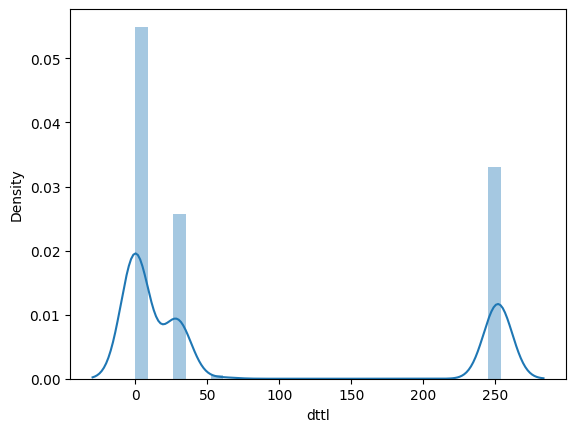

In [53]:
sns.distplot(train_df['dttl'])

In [54]:
total_sttl = train_df.loc[train_df['dttl'] == 0]   
total_sttl

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.00130,254,0,276000000.0,0.0,0,0,0.002,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,69,0,0,0,1,2,1,1,1,4,0,0,0,2,1,0,Normal,0
29,30,0.000012,udp,-,INT,2,0,1414,0,83333.33039,254,0,471333312.0,0.0,0,0,0.012,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,707,0,0,0,7,2,1,1,1,3,0,0,0,2,3,0,Normal,0
33,34,0.000025,udp,-,INT,2,0,168,0,40000.00101,254,0,26880000.0,0.0,0,0,0.025,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,84,0,0,0,11,2,1,1,1,2,0,0,0,1,5,0,Normal,0
36,37,0.000015,udp,-,INT,2,0,168,0,66666.66835,254,0,44800000.0,0.0,0,0,0.015,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,84,0,0,0,7,2,1,1,1,3,0,0,0,1,3,0,Normal,0
42,43,0.000008,udp,-,INT,2,0,168,0,125000.00030,254,0,84000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,84,0,0,0,7,2,1,1,1,1,0,0,0,1,2,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.66080,254,0,76000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,45,2,33,33,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.10720,254,0,50666664.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.10720,254,0,50666664.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.10720,254,0,50666664.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,Generic,1


In [55]:
sttl_normal = train_df.loc[(train_df['dttl'] == 0) & (train_df['label'] == 0)] 
sttl_attack = train_df.loc[(train_df['dttl'] == 0) & (train_df['label'] == 1)] 
sttl_attack

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
47911,47912,0.000009,ddp,-,INT,2,0,200,0,111111.1072,254,0,88888888.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,100,0,0,0,4,2,1,1,1,4,0,0,0,2,4,0,Backdoor,1
47912,47913,0.000009,ipv6-frag,-,INT,2,0,200,0,111111.1072,254,0,88888888.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,100,0,0,0,7,2,2,2,2,7,0,0,0,2,7,0,Backdoor,1
47913,47914,0.000009,cftp,-,INT,2,0,200,0,111111.1072,254,0,88888888.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,100,0,0,0,6,2,1,1,1,6,0,0,0,1,6,0,Backdoor,1
47914,47915,0.000003,wsn,-,INT,2,0,200,0,333333.3215,254,0,266666656.0,0.0,0,0,0.003,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,100,0,0,0,6,2,2,2,2,7,0,0,0,2,6,0,Backdoor,1
47915,47916,0.000008,pvp,-,INT,2,0,200,0,125000.0003,254,0,100000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,100,0,0,0,4,2,1,1,1,4,0,0,0,11,4,0,Backdoor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.6608,254,0,76000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,45,2,33,33,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.1072,254,0,50666664.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.1072,254,0,50666664.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.1072,254,0,50666664.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,Generic,1


In [56]:
len(sttl_normal), len(sttl_attack)

(6746, 77626)

In [57]:
len(sttl_attack) / len(total_sttl)

0.9200445645474802

#### 11. SLoad (Source Load)

In [58]:
train_df['sload'].describe()

count    1.753410e+05
mean     7.345403e+07
std      1.883574e+08
min      0.000000e+00
25%      1.305334e+04
50%      8.796748e+05
75%      8.888889e+07
max      5.988000e+09
Name: sload, dtype: float64

<Axes: xlabel='sload', ylabel='Density'>

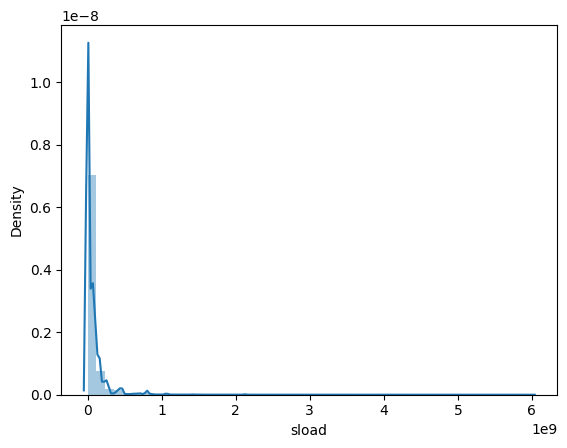

In [59]:
sns.distplot(train_df['sload'])

In [60]:
train_df.loc[train_df['sload'] == 0]   

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
57,58,0.000000,arp,-,INT,1,0,46,0,0.0,0,0,0.0,0.0,0,0,0.000,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,1,2,1,1,1,1,0,0,0,1,2,1,Normal,0
58,59,0.000000,arp,-,INT,1,0,46,0,0.0,0,0,0.0,0.0,0,0,0.000,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
938,939,0.000000,arp,-,INT,1,0,46,0,0.0,0,0,0.0,0.0,0,0,60000.568,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
939,940,0.000000,arp,-,INT,1,0,46,0,0.0,0,0,0.0,0.0,0,0,60000.548,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
3312,3313,0.000000,arp,-,INT,1,0,46,0,0.0,0,0,0.0,0.0,0,0,60000.668,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165947,165948,0.000014,mobile,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.000,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,Exploits,1
165954,165955,0.000009,sun-nd,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.000,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,DoS,1
165961,165962,0.000009,sun-nd,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.000,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,DoS,1
165968,165969,0.000009,sun-nd,-,INT,1,0,60,0,0.0,0,0,0.0,0.0,0,0,0.000,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,60,0,0,0,4,2,3,3,3,4,0,0,0,3,4,0,Exploits,1


In [61]:
train_df.loc[(train_df['sload'] == 0) & (train_df['label'] == 0)] 

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
57,58,0.0,arp,-,INT,1,0,46,0,0.0,0,0,0.0,0.0,0,0,0.000,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,1,2,1,1,1,1,0,0,0,1,2,1,Normal,0
58,59,0.0,arp,-,INT,1,0,46,0,0.0,0,0,0.0,0.0,0,0,0.000,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
938,939,0.0,arp,-,INT,1,0,46,0,0.0,0,0,0.0,0.0,0,0,60000.568,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
939,940,0.0,arp,-,INT,1,0,46,0,0.0,0,0,0.0,0.0,0,0,60000.548,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
3312,3313,0.0,arp,-,INT,1,0,46,0,0.0,0,0,0.0,0.0,0,0,60000.668,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115950,115951,0.0,arp,-,INT,1,0,46,0,0.0,0,0,0.0,0.0,0,0,60000.884,0.0,10.954532,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0
115952,115953,0.0,arp,-,INT,1,0,46,0,0.0,0,0,0.0,0.0,0,0,0.000,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0
115953,115954,0.0,arp,-,INT,1,0,46,0,0.0,0,0,0.0,0.0,0,0,0.000,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0
115955,115956,0.0,arp,-,INT,1,0,46,0,0.0,0,0,0.0,0.0,0,0,0.000,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0


#### 12. DLoad (Destination Load)

In [62]:
train_df['dload'].describe()

count    1.753410e+05
mean     6.712056e+05
std      2.421312e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.447023e+03
75%      2.784487e+04
max      2.242273e+07
Name: dload, dtype: float64

<Axes: xlabel='dload', ylabel='Density'>

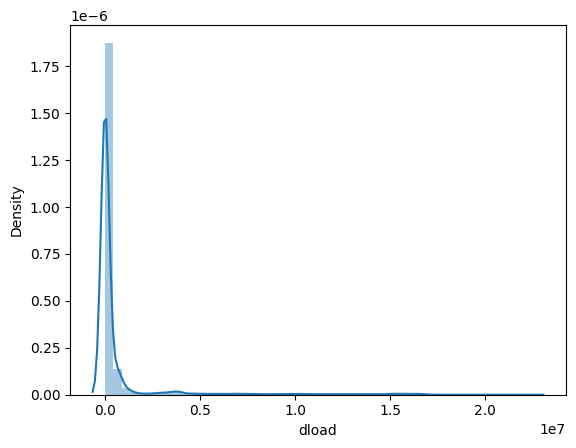

In [63]:
sns.distplot(train_df['dload'])

In [64]:
dload_total = train_df.loc[train_df['dload'] == 0]   

In [65]:
dload_normal = train_df.loc[(train_df['dload'] == 0) & (train_df['dttl'] == 0)] 
dload_attack = train_df.loc[(train_df['dload'] == 0) & (train_df['label'] == 1)] 

In [66]:
len(dload_attack) / len(dload_total)

0.9209396132400047

#### 13. sloss (Source Loss)

In [67]:
train_df['sloss'].describe()

count    175341.000000
mean          4.953000
std          66.005059
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max        4803.000000
Name: sloss, dtype: float64

In [68]:
total_sloss = train_df.loc[train_df['sloss'] == 0]
len(total_sloss) / len(train_df)

0.5443564254794943

In [69]:
sloss_normal = train_df.loc[(train_df['sloss'] == 0) & (train_df['label'] == 0)] 
sloss_attack = train_df.loc[(train_df['sloss'] == 0) & (train_df['label'] == 1)]

In [70]:
len(sloss_attack) / len(total_sloss)

0.8229926242561395

#### 14. dloss (Destination Loss)

In [71]:
train_df['dloss'].describe()

count    175341.000000
mean          6.948010
std          52.732999
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        5484.000000
Name: dloss, dtype: float64

In [72]:
total_dloss = train_df.loc[train_df['dloss'] == 0]
len(total_dloss) / len(train_df)

0.5511374977900206

In [73]:
dloss_normal = train_df.loc[(train_df['dloss'] == 0) & (train_df['label'] == 0)] 
dloss_attack = train_df.loc[(train_df['dloss'] == 0) & (train_df['label'] == 1)]

In [74]:
len(dloss_attack) / len(total_dloss)

0.8151122240963606

In [75]:
len(dloss_attack) / len(train_df)

0.44923891160652674

#### 15. sinpkt (Source Interpacket)

In [76]:
train_df['sinpkt'].describe()

count    175341.000000
mean        985.976864
std        7242.245841
min           0.000000
25%           0.008000
50%           0.279733
75%          55.156896
max       84371.496000
Name: sinpkt, dtype: float64

<Axes: xlabel='sinpkt', ylabel='Density'>

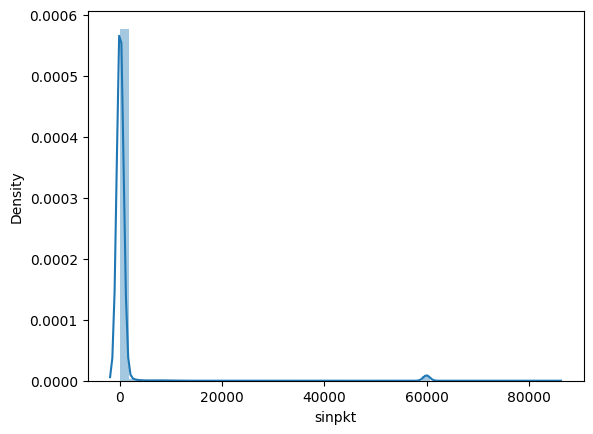

In [77]:
sns.distplot(train_df['sinpkt'])

In [78]:
total_sinpkt = train_df.loc[train_df['sinpkt'] == 0]   
len(total_sinpkt) / len(train_df)

0.003427606777650407

In [79]:
sinpkt_normal = train_df.loc[(train_df['sinpkt'] == 0) & (train_df['label'] == 0)] 
sinpkt_attack = train_df.loc[(train_df['sinpkt'] == 0) & (train_df['label'] == 1)]

In [80]:
len(sinpkt_attack) / len(total_sinpkt)

0.5607321131447587

In [81]:
len(sinpkt_attack) / len(train_df)

0.0019219691914612099

#### 16. dinpkt (Destination Interpacket)

In [82]:
train_df['dinpkt'].describe()

count    175341.000000
mean         88.216296
std         987.093195
min           0.000000
25%           0.000000
50%           0.006000
75%          51.053000
max       56716.824000
Name: dinpkt, dtype: float64

<Axes: xlabel='dinpkt', ylabel='Density'>

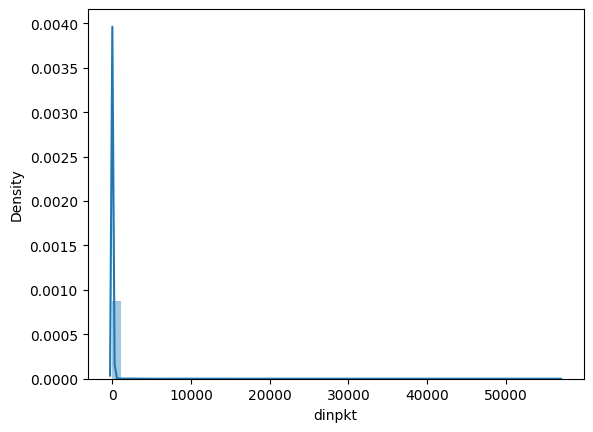

In [83]:
sns.distplot(train_df['dinpkt'])

In [84]:
total_dinpkt = train_df.loc[train_df['dinpkt'] == 0]
len(total_dinpkt) / len(train_df), len(total_dinpkt)

(0.48073753429032573, 84293)

In [85]:
dinpkt_normal = train_df.loc[(train_df['dinpkt'] == 0) & (train_df['label'] == 0)] 
dinpkt_attack = train_df.loc[(train_df['dinpkt'] == 0) & (train_df['label'] == 1)]

In [86]:
len(dinpkt_attack) / len(total_dinpkt)

0.9209068368666438

In [87]:
pointbiserialr(train_df['dinpkt'], train_df['label'])

SignificanceResult(statistic=np.float64(-0.022887477717627756), pvalue=np.float64(9.243100141389265e-22))

#### 17. sjit (Source Jitter)

In [88]:
train_df['sjit'].describe()

count    1.753410e+05
mean     4.976254e+03
std      4.496585e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.513295e+03
max      1.460480e+06
Name: sjit, dtype: float64

<Axes: xlabel='sjit', ylabel='Density'>

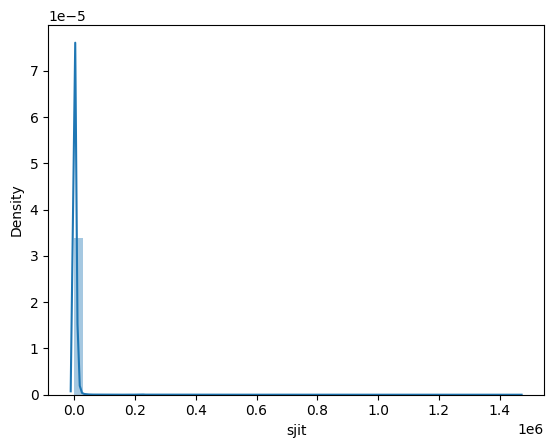

In [89]:
sns.distplot(train_df['sjit'])

In [90]:
total_sjit = train_df.loc[train_df['sjit'] == 0]
len(total_sjit) / len(train_df), len(total_sjit)

(0.5046965626978288, 88494)

In [91]:
sjit_normal = train_df.loc[(train_df['sjit'] == 0) & (train_df['label'] == 0)] 
sjit_attack = train_df.loc[(train_df['sjit'] == 0) & (train_df['label'] == 1)]

In [92]:
len(sjit_attack) / len(total_sjit)

0.8418197843921622

#### 18. djit (Destination Jitter)

In [93]:
train_df['djit'].describe()

count    175341.000000
mean        604.353826
std        4061.043281
min           0.000000
25%           0.000000
50%           0.000000
75%         114.990625
max      289388.269700
Name: djit, dtype: float64

<Axes: xlabel='djit', ylabel='Density'>

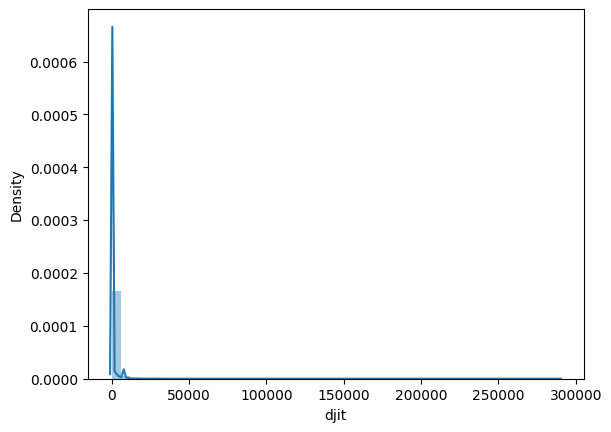

In [94]:
sns.distplot(train_df['djit'])

In [95]:
total_djit = train_df.loc[train_df['djit'] == 0]
len(total_djit) / len(train_df), len(total_djit)

(0.534632516068689, 93743)

In [96]:
djit_normal = train_df.loc[(train_df['djit'] == 0) & (train_df['label'] == 0)] 
djit_attack = train_df.loc[(train_df['djit'] == 0) & (train_df['label'] == 1)]

In [97]:
len(djit_attack) / len(total_djit)

0.8359450838995979

In [98]:
len(djit_attack) / len(train_df)

0.4469234235004933

#### 19. swin (Source Window)

In [99]:
train_df['swin'].describe()

count    175341.000000
mean        116.257339
std         127.001024
min           0.000000
25%           0.000000
50%           0.000000
75%         255.000000
max         255.000000
Name: swin, dtype: float64

In [100]:
total_swin = train_df.loc[train_df['swin'] == 0]
len(total_swin) / len(train_df), len(total_swin)

(0.5440541573277214, 95395)

In [101]:
swin_normal = train_df.loc[(train_df['swin'] == 0) & (train_df['label'] == 0)] 
swin_attack = train_df.loc[(train_df['swin'] == 0) & (train_df['label'] == 1)]

In [102]:
len(swin_attack) / len(total_swin)

0.8230620053461921

#### 20. stcpb (Source TCP Base)

In [103]:
train_df['stcpb'].describe()

count    1.753410e+05
mean     9.692504e+08
std      1.355264e+09
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.916651e+09
max      4.294959e+09
Name: stcpb, dtype: float64

In [104]:
total_stcpb = train_df.loc[train_df['stcpb'] == 0]
len(total_stcpb) / len(train_df), len(total_stcpb)

(0.5489075572741116, 96246)

In [105]:
stcpb_normal = train_df.loc[(train_df['stcpb'] == 0) & (train_df['label'] == 0)] 
stcpb_attack = train_df.loc[(train_df['stcpb'] == 0) & (train_df['label'] == 1)]

In [106]:
len(stcpb_attack) / len(total_stcpb)

0.8157845520852814

In [107]:
len(stcpb_attack) / len(train_df)

0.4477903057470871

#### 21. dtcpb (Destination TCP Base)

In [108]:
train_df['dtcpb'].describe()

count    1.753410e+05
mean     9.688770e+08
std      1.354000e+09
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.913675e+09
max      4.294882e+09
Name: dtcpb, dtype: float64

In [109]:
total_dtcpb = train_df.loc[train_df['dtcpb'] == 0]
len(total_dtcpb) / len(train_df), len(total_dtcpb)

(0.5489417763101614, 96252)

In [110]:
dtcpb_normal = train_df.loc[(train_df['dtcpb'] == 0) & (train_df['label'] == 0)] 
dtcpb_attack = train_df.loc[(train_df['dtcpb'] == 0) & (train_df['label'] == 1)]

In [111]:
len(dtcpb_attack) / len(total_dtcpb)

0.8157336990400199

In [112]:
train_df.loc[(train_df['dtcpb'] == 0) & (train_df['stcpb'] == 0)] 

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.00130,254,0,276000000.0,0.0,0,0,0.002,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,69,0,0,0,1,2,1,1,1,4,0,0,0,2,1,0,Normal,0
29,30,0.000012,udp,-,INT,2,0,1414,0,83333.33039,254,0,471333312.0,0.0,0,0,0.012,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,707,0,0,0,7,2,1,1,1,3,0,0,0,2,3,0,Normal,0
33,34,0.000025,udp,-,INT,2,0,168,0,40000.00101,254,0,26880000.0,0.0,0,0,0.025,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,84,0,0,0,11,2,1,1,1,2,0,0,0,1,5,0,Normal,0
36,37,0.000015,udp,-,INT,2,0,168,0,66666.66835,254,0,44800000.0,0.0,0,0,0.015,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,84,0,0,0,7,2,1,1,1,3,0,0,0,1,3,0,Normal,0
42,43,0.000008,udp,-,INT,2,0,168,0,125000.00030,254,0,84000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,84,0,0,0,7,2,1,1,1,1,0,0,0,1,2,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.66080,254,0,76000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,45,2,33,33,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.10720,254,0,50666664.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.10720,254,0,50666664.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.10720,254,0,50666664.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,Generic,1


#### 22. dwin (Destination Window)

In [113]:
train_df['dwin'].describe()

count    175341.000000
mean        115.013625
std         126.886530
min           0.000000
25%           0.000000
50%           0.000000
75%         255.000000
max         255.000000
Name: dwin, dtype: float64

In [114]:
total_dwin = train_df.loc[train_df['dwin'] == 0]
len(total_dwin) / len(train_df), len(total_dwin)

(0.5489474794828363, 96253)

In [115]:
dwin_normal = train_df.loc[(train_df['dwin'] == 0) & (train_df['label'] == 0)] 
dwin_attack = train_df.loc[(train_df['dwin'] == 0) & (train_df['label'] == 1)]

In [116]:
len(dwin_attack) / len(total_dwin)

0.8157252241488577

#### 23. tcprtt (TCP Round Trip Time)

In [117]:
train_df['tcprtt'].describe()

count    175341.000000
mean          0.041396
std           0.079354
min           0.000000
25%           0.000000
50%           0.000000
75%           0.065481
max           2.518893
Name: tcprtt, dtype: float64

In [118]:
total_tcprtt = train_df.loc[train_df['tcprtt'] == 0]
len(total_tcprtt) / len(train_df), len(total_tcprtt)

(0.5492155285985594, 96300)

In [119]:
tcprtt_normal = train_df.loc[(train_df['tcprtt'] == 0) & (train_df['label'] == 0)] 
tcprtt_attack = train_df.loc[(train_df['tcprtt'] == 0) & (train_df['label'] == 1)]

In [120]:
len(tcprtt_attack) / len(total_tcprtt)

0.8156178608515057

#### 24. synack (SYN & SYN/ACK)

In [121]:
train_df['synack'].describe()

count    175341.000000
mean          0.021020
std           0.043400
min           0.000000
25%           0.000000
50%           0.000000
75%           0.023268
max           2.100352
Name: synack, dtype: float64

#### 25. ackdat (ACK & ACK?SYN)

In [122]:
train_df['ackdat'].describe()

count    175341.000000
mean          0.020375
std           0.040506
min           0.000000
25%           0.000000
50%           0.000000
75%           0.038906
max           1.520884
Name: ackdat, dtype: float64

#### 26. smean (Source Mean)

In [123]:
train_df['smean'].describe()

count    175341.000000
mean        136.751769
std         204.677360
min          28.000000
25%          57.000000
50%          73.000000
75%         100.000000
max        1504.000000
Name: smean, dtype: float64

<Axes: xlabel='smean', ylabel='Density'>

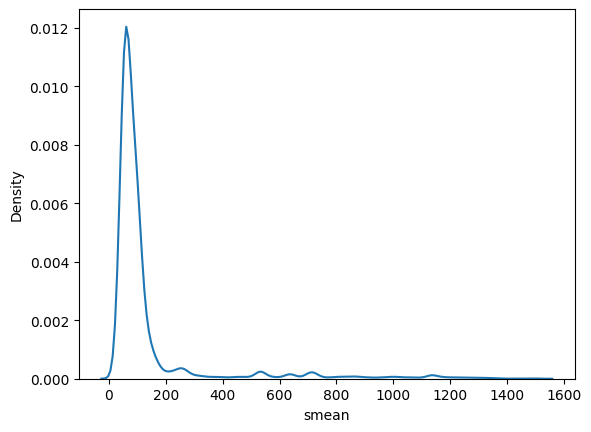

In [124]:
sns.kdeplot(train_df['smean'])

In [125]:
smean_less200 = train_df.loc[(train_df['smean'] < 200)]
smean_l200_attack = train_df.loc[(train_df['smean'] < 200) & (train_df['label'] == 1)] 

In [126]:
len(smean_l200_attack) / len(smean_less200)

0.6844963918317212

In [127]:
len(smean_less200) / len(train_df)

0.8914743271682036

#### 27. dmean (Destination Mean)

In [128]:
train_df['dmean'].describe()

count    175341.000000
mean        124.173382
std         258.317056
min           0.000000
25%           0.000000
50%          44.000000
75%          89.000000
max        1458.000000
Name: dmean, dtype: float64

In [129]:
total_dmean = train_df.loc[train_df['dmean'] == 0]
len(total_dmean) / len(train_df), len(total_dmean)

(0.48067479939090113, 84282)

In [130]:
dmean_normal = train_df.loc[(train_df['dmean'] == 0) & (train_df['label'] == 0)] 
dmean_attack = train_df.loc[(train_df['dmean'] == 0) & (train_df['label'] == 1)]

In [131]:
len(dmean_attack) / len(total_dmean)

0.9210270283097222

In [132]:
train_df.loc[(train_df['dmean'] == 0) & (train_df['dttl'] == 0) & (train_df['dpkts'] == 0) & (train_df['dload'] == 0) & (train_df['dinpkt'] == 0)]

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.00130,254,0,276000000.0,0.0,0,0,0.002,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,69,0,0,0,1,2,1,1,1,4,0,0,0,2,1,0,Normal,0
29,30,0.000012,udp,-,INT,2,0,1414,0,83333.33039,254,0,471333312.0,0.0,0,0,0.012,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,707,0,0,0,7,2,1,1,1,3,0,0,0,2,3,0,Normal,0
33,34,0.000025,udp,-,INT,2,0,168,0,40000.00101,254,0,26880000.0,0.0,0,0,0.025,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,84,0,0,0,11,2,1,1,1,2,0,0,0,1,5,0,Normal,0
36,37,0.000015,udp,-,INT,2,0,168,0,66666.66835,254,0,44800000.0,0.0,0,0,0.015,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,84,0,0,0,7,2,1,1,1,3,0,0,0,1,3,0,Normal,0
42,43,0.000008,udp,-,INT,2,0,168,0,125000.00030,254,0,84000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,84,0,0,0,7,2,1,1,1,1,0,0,0,1,2,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.66080,254,0,76000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,45,2,33,33,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.10720,254,0,50666664.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.10720,254,0,50666664.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.10720,254,0,50666664.0,0.0,0,0,0.009,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,Generic,1


#### 28. trans_depth (Transaction Depth

In [133]:
train_df['trans_depth'].unique()

array([  0,   1,   2,  80, 155,   3,   5,   4, 163, 172,  39])

In [134]:
train_df['trans_depth'].value_counts()

trans_depth
0      157501
1       17747
2          80
4           3
5           2
39          2
3           2
80          1
155         1
163         1
172         1
Name: count, dtype: int64

#### 29. response body len

In [135]:
train_df['response_body_len'].describe()

count    1.753410e+05
mean     2.144292e+03
std      5.420797e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.558056e+06
Name: response_body_len, dtype: float64

In [136]:
total_rbl = train_df.loc[train_df['response_body_len'] == 0]
len(total_rbl) / len(train_df), len(total_rbl)

(0.9355883678090121, 164047)

#### 30. ct srv src (Count Service Source)

In [137]:
train_df['ct_srv_src'].describe()

count    175341.000000
mean          9.306437
std          10.704331
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max          63.000000
Name: ct_srv_src, dtype: float64

In [138]:
train_df['ct_srv_src'].nunique()

52

<Axes: xlabel='ct_srv_src', ylabel='Density'>

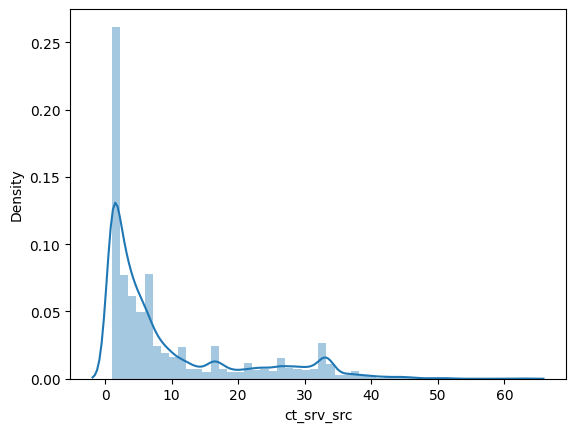

In [139]:
sns.distplot(train_df['ct_srv_src'])

#### 31. ct state ttl (Count State Time-to-Live)

In [140]:
train_df['ct_state_ttl'].describe()

count    175341.000000
mean          1.304179
std           0.954406
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: ct_state_ttl, dtype: float64

In [141]:
train_df['ct_state_ttl'].unique()

array([0, 1, 2, 3, 6])

<Axes: xlabel='ct_state_ttl', ylabel='Density'>

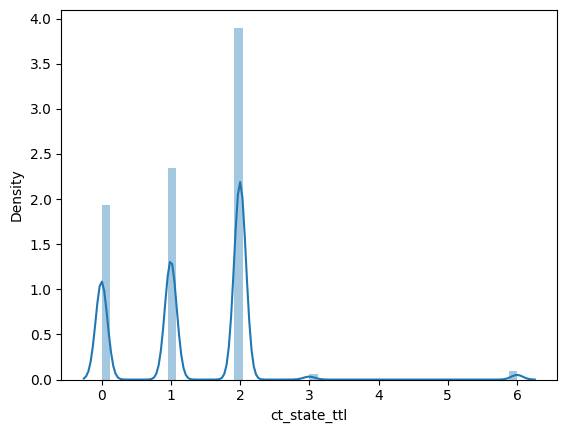

In [142]:
sns.distplot(train_df['ct_state_ttl'])

#### 32. ct dst ltm (Count DEstination Lifetime)

In [143]:
train_df['ct_dst_ltm'].describe()

count    175341.000000
mean          6.193936
std           8.052476
min           1.000000
25%           1.000000
50%           2.000000
75%           7.000000
max          51.000000
Name: ct_dst_ltm, dtype: float64

In [144]:
train_df['ct_dst_ltm'].nunique()

50

<Axes: xlabel='ct_dst_ltm', ylabel='Density'>

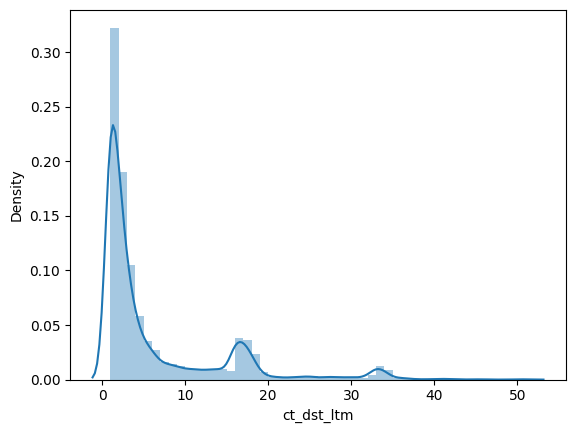

In [145]:
sns.distplot(train_df['ct_dst_ltm'])

#### 33. ct src dport ltm (Count Source Destination Port Lifetime)

In [146]:
train_df['ct_src_dport_ltm'].describe()

count    175341.000000
mean          5.383538
std           8.047104
min           1.000000
25%           1.000000
50%           1.000000
75%           5.000000
max          51.000000
Name: ct_src_dport_ltm, dtype: float64

In [147]:
train_df['ct_src_dport_ltm'].nunique()

47

<Axes: xlabel='ct_src_dport_ltm', ylabel='Density'>

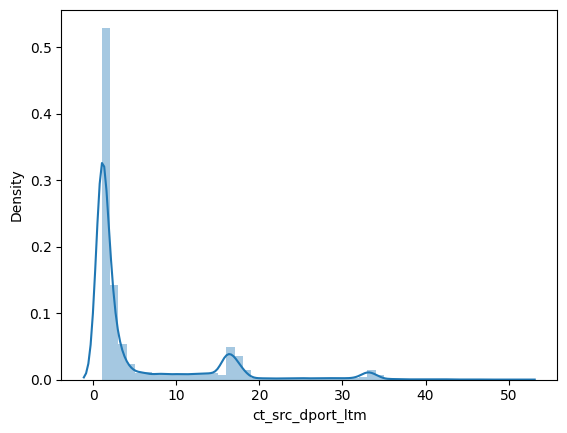

In [148]:
sns.distplot(train_df['ct_src_dport_ltm'])

#### 34. ct dst sport ltm (Count Destination Source Port Lifetime)

In [149]:
train_df['ct_dst_sport_ltm'].describe()

count    175341.000000
mean          4.206255
std           5.783585
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          46.000000
Name: ct_dst_sport_ltm, dtype: float64

In [150]:
train_df['ct_dst_sport_ltm'].nunique()

32

<Axes: xlabel='ct_dst_sport_ltm', ylabel='Density'>

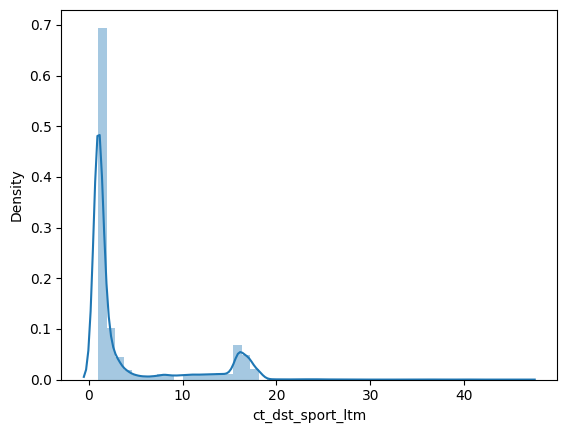

In [151]:
sns.distplot(train_df['ct_dst_sport_ltm'])

#### 35. ct dst src ltm (Count Destination Source Lifetime)

In [152]:
train_df['ct_dst_src_ltm'].describe()

count    175341.000000
mean          8.729881
std          10.956186
min           1.000000
25%           1.000000
50%           3.000000
75%          12.000000
max          65.000000
Name: ct_dst_src_ltm, dtype: float64

In [153]:
train_df['ct_dst_src_ltm'].nunique()

54

<Axes: xlabel='ct_dst_src_ltm', ylabel='Density'>

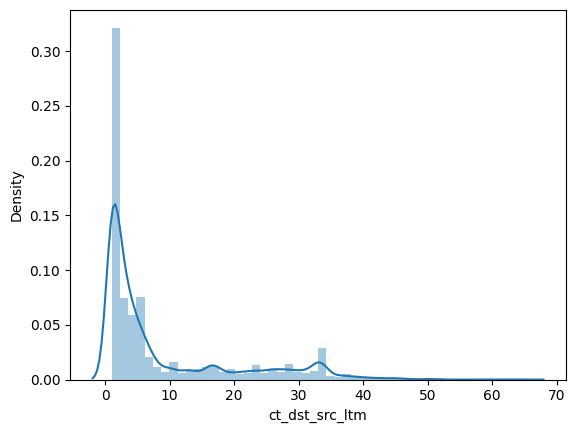

In [154]:
sns.distplot(train_df['ct_dst_src_ltm'])

#### 36. is ftp login

In [155]:
train_df['is_ftp_login'].unique()

array([0, 1, 2, 4])

In [156]:
ftp_2 = train_df.loc[train_df['is_ftp_login'] == 2]
ftp_2

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
13114,13115,1.459935,tcp,ftp,FIN,32,34,1786,2340,44.522532,31,29,9485.354492,12449.870120,6,9,47.084516,42.141332,98.747422,114.922516,255,3187688427,1190900774,255,0.000000,0.000000,0.000000,56,69,0,0,2,0,3,2,2,4,2,2,0,5,2,0,Normal,0
13130,13131,1.459935,tcp,ftp,FIN,32,34,1786,2340,44.522532,31,29,9485.354492,12449.870120,6,9,47.084516,42.141332,98.747422,114.922516,255,3187688427,1190900774,255,0.000000,0.000000,0.000000,56,69,0,0,2,0,3,2,2,4,2,2,0,5,2,0,Normal,0
48027,48028,55.968578,tcp,ftp,FIN,28,24,1560,1364,0.911226,254,252,215.120697,186.962051,16,10,2072.012854,2429.717750,327619.098500,10979.056000,255,3730612194,2988658491,255,0.193921,0.085057,0.108864,56,57,0,0,3,1,1,1,1,3,2,2,0,1,3,0,Fuzzers,1
48224,48225,34.455128,tcp,ftp,FIN,30,24,1610,1364,1.538233,254,252,361.513672,303.699341,10,16,1185.715518,1495.680375,187570.933100,6498.856500,255,2135145430,2861698135,255,0.114631,0.054480,0.060151,54,57,0,0,4,1,2,2,2,4,2,2,0,2,4,0,Fuzzers,1
48306,48307,55.968578,tcp,ftp,FIN,28,24,1560,1364,0.911226,254,252,215.120697,186.962051,16,10,2072.012854,2429.717750,327619.098500,10979.056000,255,3730612194,2988658491,255,0.193921,0.085057,0.108864,56,57,0,0,4,1,1,1,1,4,2,2,0,2,4,0,Fuzzers,1
48439,48440,34.455128,tcp,ftp,FIN,30,24,1610,1364,1.538233,254,252,361.513672,303.699341,10,16,1185.715518,1495.680375,187570.933100,6498.856500,255,2135145430,2861698135,255,0.114631,0.054480,0.060151,54,57,0,0,4,1,2,2,2,4,2,2,0,2,4,0,Fuzzers,1


In [157]:
ftp_4 = train_df.loc[train_df['is_ftp_login'] == 4]
ftp_4

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
81497,81498,1.564220,tcp,ftp,CON,14,12,690,940,15.982407,62,252,3278.311279,4408.587402,5,6,120.324613,110.860094,6990.464124,179.335516,255,1496364266,3454385693,255,0.156163,0.099627,0.056536,49,78,0,0,2,3,2,2,2,2,4,4,0,5,2,0,Exploits,1
81522,81523,0.742644,tcp,ftp,FIN,10,10,578,690,25.584263,62,252,5612.379395,6689.611816,1,3,82.516000,63.948667,135.069156,3520.804553,255,1496364312,3454385916,255,0.000000,0.000000,0.000000,58,69,0,0,2,1,3,2,2,3,4,4,0,8,2,0,Exploits,1
82973,82974,1.564220,tcp,ftp,CON,14,12,690,940,15.982407,62,252,3278.311279,4408.587402,5,6,120.324613,110.860094,6990.464124,179.335516,255,1496364266,3454385693,255,0.156163,0.099627,0.056536,49,78,0,0,2,3,2,2,2,2,4,4,0,5,2,0,Exploits,1
86897,86898,1.564220,tcp,ftp,CON,14,12,690,940,15.982407,62,252,3278.311279,4408.587402,5,6,120.324613,110.860094,6990.464124,179.335516,255,1496364266,3454385693,255,0.156163,0.099627,0.056536,49,78,0,0,2,3,2,2,2,2,4,4,0,5,2,0,Exploits,1
86990,86991,0.742644,tcp,ftp,FIN,10,10,578,690,25.584263,62,252,5612.379395,6689.611816,1,3,82.516000,63.948667,135.069156,3520.804553,255,1496364312,3454385916,255,0.000000,0.000000,0.000000,58,69,0,0,2,1,3,2,2,3,4,4,0,8,2,0,Exploits,1
91976,91977,0.742644,tcp,ftp,FIN,10,10,578,690,25.584263,62,252,5612.379395,6689.611816,1,3,82.516000,63.948667,135.069156,3520.804553,255,1496364312,3454385916,255,0.000000,0.000000,0.000000,58,69,0,0,2,1,3,2,2,3,4,4,0,8,2,0,Exploits,1
92705,92706,1.564220,tcp,ftp,CON,14,12,690,940,15.982407,62,252,3278.311279,4408.587402,5,6,120.324613,110.860094,6990.464124,179.335516,255,1496364266,3454385693,255,0.156163,0.099627,0.056536,49,78,0,0,2,3,2,2,2,2,4,4,0,5,2,0,Exploits,1
92784,92785,0.742644,tcp,ftp,FIN,10,10,578,690,25.584263,62,252,5612.379395,6689.611816,1,3,82.516000,63.948667,135.069156,3520.804553,255,1496364312,3454385916,255,0.000000,0.000000,0.000000,58,69,0,0,2,1,3,2,2,3,4,4,0,8,2,0,Exploits,1
97585,97586,2.349103,tcp,ftp,CON,14,14,690,1038,11.493749,62,252,2182.960938,3282.955322,5,6,180.700231,154.221469,9278.627855,217.442547,255,290151449,1270203138,255,0.228658,0.058391,0.170267,49,74,0,0,2,3,2,2,2,2,4,4,0,2,2,0,Exploits,1
97596,97597,1.142602,tcp,ftp,FIN,10,10,598,690,16.628713,62,252,3773.842529,4347.970703,1,3,126.926000,110.608000,161.270906,5417.904178,255,290151495,1270203367,255,0.000000,0.000000,0.000000,60,69,0,0,1,1,1,1,1,2,4,4,0,1,1,0,Exploits,1


In [158]:
len(ftp_4), len(ftp_2)

(16, 6)

#### 37. ct ftp cmd (Count FTP Commamd)

In [159]:
train_df['ct_ftp_cmd'].unique()

array([0, 1, 2, 4])

In [160]:
train_df['ct_ftp_cmd'].value_counts()

ct_ftp_cmd
0    172774
1      2545
4        16
2         6
Name: count, dtype: int64

In [161]:
ftp_cmd_2 = train_df.loc[train_df['ct_ftp_cmd'] == 2]
ftp_cmd_4 = train_df.loc[train_df['ct_ftp_cmd'] == 4]
ftp_cmd_2

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
13114,13115,1.459935,tcp,ftp,FIN,32,34,1786,2340,44.522532,31,29,9485.354492,12449.870120,6,9,47.084516,42.141332,98.747422,114.922516,255,3187688427,1190900774,255,0.000000,0.000000,0.000000,56,69,0,0,2,0,3,2,2,4,2,2,0,5,2,0,Normal,0
13130,13131,1.459935,tcp,ftp,FIN,32,34,1786,2340,44.522532,31,29,9485.354492,12449.870120,6,9,47.084516,42.141332,98.747422,114.922516,255,3187688427,1190900774,255,0.000000,0.000000,0.000000,56,69,0,0,2,0,3,2,2,4,2,2,0,5,2,0,Normal,0
48027,48028,55.968578,tcp,ftp,FIN,28,24,1560,1364,0.911226,254,252,215.120697,186.962051,16,10,2072.012854,2429.717750,327619.098500,10979.056000,255,3730612194,2988658491,255,0.193921,0.085057,0.108864,56,57,0,0,3,1,1,1,1,3,2,2,0,1,3,0,Fuzzers,1
48224,48225,34.455128,tcp,ftp,FIN,30,24,1610,1364,1.538233,254,252,361.513672,303.699341,10,16,1185.715518,1495.680375,187570.933100,6498.856500,255,2135145430,2861698135,255,0.114631,0.054480,0.060151,54,57,0,0,4,1,2,2,2,4,2,2,0,2,4,0,Fuzzers,1
48306,48307,55.968578,tcp,ftp,FIN,28,24,1560,1364,0.911226,254,252,215.120697,186.962051,16,10,2072.012854,2429.717750,327619.098500,10979.056000,255,3730612194,2988658491,255,0.193921,0.085057,0.108864,56,57,0,0,4,1,1,1,1,4,2,2,0,2,4,0,Fuzzers,1
48439,48440,34.455128,tcp,ftp,FIN,30,24,1610,1364,1.538233,254,252,361.513672,303.699341,10,16,1185.715518,1495.680375,187570.933100,6498.856500,255,2135145430,2861698135,255,0.114631,0.054480,0.060151,54,57,0,0,4,1,2,2,2,4,2,2,0,2,4,0,Fuzzers,1


In [162]:
ftp_cmd_4

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
81497,81498,1.564220,tcp,ftp,CON,14,12,690,940,15.982407,62,252,3278.311279,4408.587402,5,6,120.324613,110.860094,6990.464124,179.335516,255,1496364266,3454385693,255,0.156163,0.099627,0.056536,49,78,0,0,2,3,2,2,2,2,4,4,0,5,2,0,Exploits,1
81522,81523,0.742644,tcp,ftp,FIN,10,10,578,690,25.584263,62,252,5612.379395,6689.611816,1,3,82.516000,63.948667,135.069156,3520.804553,255,1496364312,3454385916,255,0.000000,0.000000,0.000000,58,69,0,0,2,1,3,2,2,3,4,4,0,8,2,0,Exploits,1
82973,82974,1.564220,tcp,ftp,CON,14,12,690,940,15.982407,62,252,3278.311279,4408.587402,5,6,120.324613,110.860094,6990.464124,179.335516,255,1496364266,3454385693,255,0.156163,0.099627,0.056536,49,78,0,0,2,3,2,2,2,2,4,4,0,5,2,0,Exploits,1
86897,86898,1.564220,tcp,ftp,CON,14,12,690,940,15.982407,62,252,3278.311279,4408.587402,5,6,120.324613,110.860094,6990.464124,179.335516,255,1496364266,3454385693,255,0.156163,0.099627,0.056536,49,78,0,0,2,3,2,2,2,2,4,4,0,5,2,0,Exploits,1
86990,86991,0.742644,tcp,ftp,FIN,10,10,578,690,25.584263,62,252,5612.379395,6689.611816,1,3,82.516000,63.948667,135.069156,3520.804553,255,1496364312,3454385916,255,0.000000,0.000000,0.000000,58,69,0,0,2,1,3,2,2,3,4,4,0,8,2,0,Exploits,1
91976,91977,0.742644,tcp,ftp,FIN,10,10,578,690,25.584263,62,252,5612.379395,6689.611816,1,3,82.516000,63.948667,135.069156,3520.804553,255,1496364312,3454385916,255,0.000000,0.000000,0.000000,58,69,0,0,2,1,3,2,2,3,4,4,0,8,2,0,Exploits,1
92705,92706,1.564220,tcp,ftp,CON,14,12,690,940,15.982407,62,252,3278.311279,4408.587402,5,6,120.324613,110.860094,6990.464124,179.335516,255,1496364266,3454385693,255,0.156163,0.099627,0.056536,49,78,0,0,2,3,2,2,2,2,4,4,0,5,2,0,Exploits,1
92784,92785,0.742644,tcp,ftp,FIN,10,10,578,690,25.584263,62,252,5612.379395,6689.611816,1,3,82.516000,63.948667,135.069156,3520.804553,255,1496364312,3454385916,255,0.000000,0.000000,0.000000,58,69,0,0,2,1,3,2,2,3,4,4,0,8,2,0,Exploits,1
97585,97586,2.349103,tcp,ftp,CON,14,14,690,1038,11.493749,62,252,2182.960938,3282.955322,5,6,180.700231,154.221469,9278.627855,217.442547,255,290151449,1270203138,255,0.228658,0.058391,0.170267,49,74,0,0,2,3,2,2,2,2,4,4,0,2,2,0,Exploits,1
97596,97597,1.142602,tcp,ftp,FIN,10,10,598,690,16.628713,62,252,3773.842529,4347.970703,1,3,126.926000,110.608000,161.270906,5417.904178,255,290151495,1270203367,255,0.000000,0.000000,0.000000,60,69,0,0,1,1,1,1,1,2,4,4,0,1,1,0,Exploits,1


#### 38. ct flw http mthd (Count Flow HTTP Method)

In [163]:
train_df['ct_flw_http_mthd'].unique()

array([ 0,  1,  4,  2,  9, 12,  6, 25, 16, 30,  3])

In [164]:
train_df['ct_flw_http_mthd'].value_counts()

ct_flw_http_mthd
0     157501
1      16696
4        846
9         90
2         74
6         36
30        30
25        25
12        24
16        16
3          3
Name: count, dtype: int64

In [165]:
flw_http_4 = train_df.loc[train_df['ct_flw_http_mthd'] == 4]
flw_http_4['label'].value_counts()

label
1    546
0    300
Name: count, dtype: int64

#### 39. ct src ltm (Count Source Lifetime)

In [166]:
train_df['ct_src_ltm'].nunique()

50

<Axes: xlabel='ct_src_ltm', ylabel='Density'>

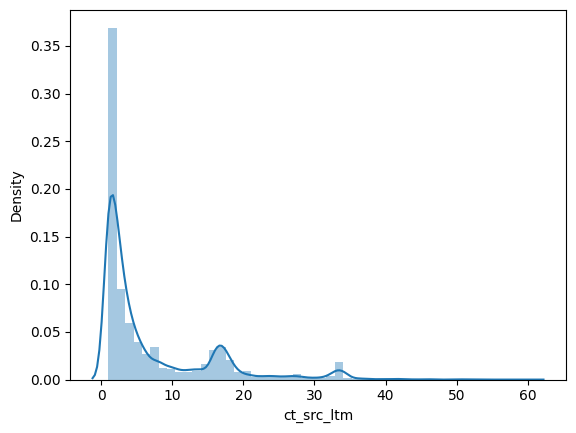

In [167]:
sns.distplot(train_df['ct_src_ltm'])

#### 40. ct srv dst (Count Service Destination)

In [168]:
train_df['ct_srv_dst'].nunique()

52

In [169]:
train_df['ct_srv_dst'].describe()

count    175341.000000
mean          9.100758
std          10.756952
min           1.000000
25%           2.000000
50%           4.000000
75%          12.000000
max          62.000000
Name: ct_srv_dst, dtype: float64

<Axes: xlabel='ct_srv_dst', ylabel='Density'>

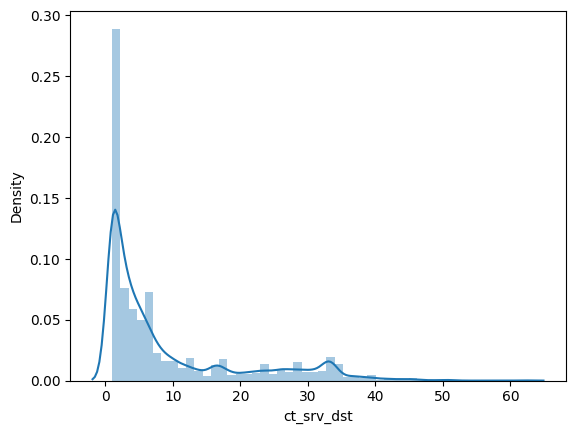

In [170]:
sns.distplot(train_df['ct_srv_dst'])

#### 41. is sm ips ports (Is Small IP ports)

In [171]:
train_df['is_sm_ips_ports'].unique()

array([0, 1])

In [172]:
train_df['is_sm_ips_ports'].value_counts()

is_sm_ips_ports
0    172579
1      2762
Name: count, dtype: int64

In [173]:
sm_ip_1 = train_df.loc[train_df['is_sm_ips_ports'] == 1]

In [174]:
sm_ip_1['label'].value_counts()

label
0    2762
Name: count, dtype: int64

#### 42. attack cat

In [175]:
train_df['attack_cat'].unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [176]:
train_df['attack_cat'].value_counts()

attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

In [177]:
train_df.label.value_counts(normalize = 'true')

label
1    0.680622
0    0.319378
Name: proportion, dtype: float64

In [178]:
pd.DataFrame(train_df.groupby('attack_cat')['label'].value_counts()).reset_index()

,attack_cat,label,count
0,Analysis,1,2000
1,Backdoor,1,1746
2,DoS,1,12264
3,Exploits,1,33393
4,Fuzzers,1,18184
5,Generic,1,40000
6,Normal,0,56000
7,Reconnaissance,1,10491
8,Shellcode,1,1133
9,Worms,1,130
